# Disclamer: Example here is NOT a neural model

This is a simple example showing how to use TensorGroup and DirectedTensorGroup classes.


In [1]:
import os
import sys
sys.path.insert(1, os.path.realpath(os.path.pardir))

import numpy as np

from bbtoolkit.structures.tensorgroups import DirectedTensorGroup, DirectedTensor, TensorGroup, NamedTensor

### Create TensorGroup

In [2]:
n_neurons = 10
n_synapses = 1000
n_timepoints = 10

w1 = np.random.rand(n_neurons, n_timepoints, n_synapses)
w2 = np.random.rand(n_synapses, n_timepoints)
w3 = np.random.rand(n_neurons, n_timepoints)
w4 = np.random.rand(n_neurons, n_timepoints)


neural_data = DirectedTensorGroup(
    DirectedTensor(
        'population_a',
        'population_b',
        w1.copy()
    ),
    DirectedTensor(
        'population_b',
        'population_a',
        w2.copy()
    ),
    DirectedTensor(
        'population_c',
        'population_a',
        w3.copy()
    ),
    DirectedTensor(
        'population_c',
        'population_b',
        w4.copy()
    )
)

### How does it look like?

In [3]:
neural_data

DirectedTensorGroup(population_a->population_b: (10, 10, 1000), population_b->population_a: (1000, 10), population_c->population_a: (10, 10), population_c->population_b: (10, 10))

### Other way to check that

In [4]:
neural_data.connection_map

,population_a,population_b,population_c
population_a,0,1,0
population_b,1,0,0
population_c,1,1,0


### Other way to check that

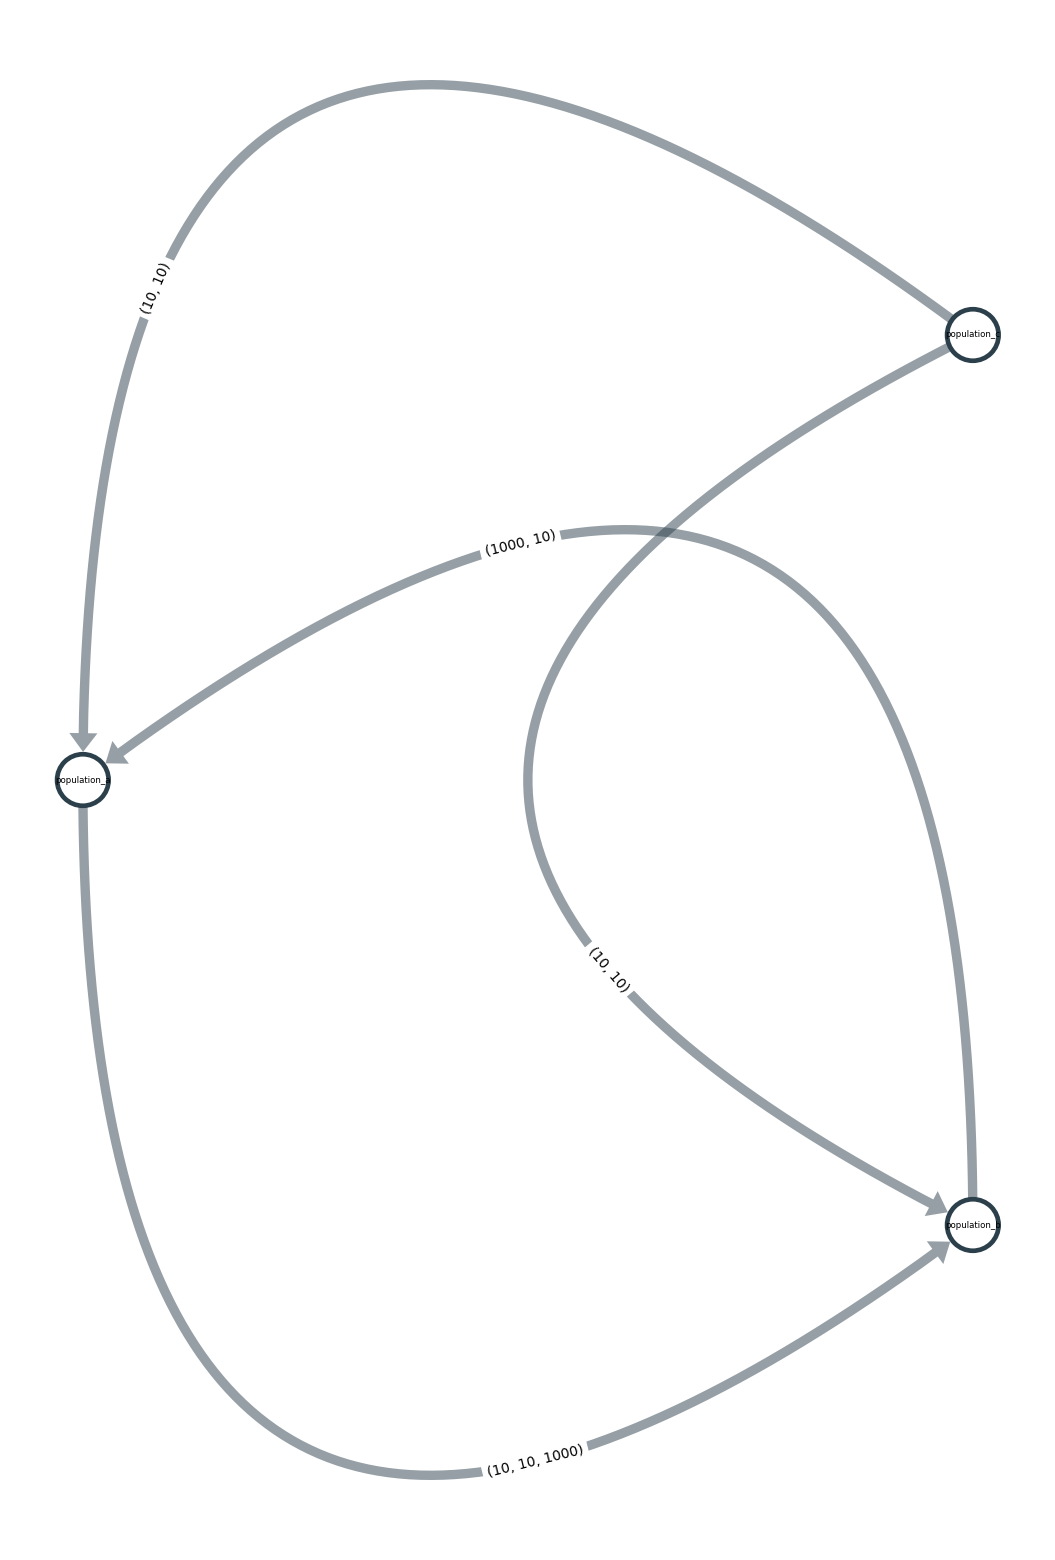

In [5]:
fig = neural_data.plot()

### What is inside?

In [6]:
neural_data.population_c.to.population_b

array([[0.07077834, 0.05312727, 0.66468818, 0.08663906, 0.91814334,
        0.17303821, 0.40555123, 0.80652164, 0.8552709 , 0.07485598],
       [0.4573142 , 0.75202382, 0.08615339, 0.61290967, 0.10435011,
        0.00735083, 0.69861108, 0.55293757, 0.12272398, 0.17554698],
       [0.17521663, 0.14900691, 0.39586567, 0.97656273, 0.2033094 ,
        0.6415144 , 0.29053314, 0.93536561, 0.72249697, 0.02414507],
       [0.94128866, 0.08536659, 0.54883785, 0.27438312, 0.49988314,
        0.20062719, 0.41933281, 0.21673818, 0.38058727, 0.6643808 ],
       [0.01292316, 0.41911121, 0.32468602, 0.07210139, 0.25750878,
        0.28065121, 0.35610677, 0.19516789, 0.38985954, 0.71623189],
       [0.78666828, 0.59438444, 0.26278196, 0.85188361, 0.13581819,
        0.26888784, 0.24148435, 0.77285169, 0.67369856, 0.85256452],
       [0.06676489, 0.31944296, 0.46356859, 0.26625962, 0.59368272,
        0.01687757, 0.4357302 , 0.73320913, 0.61052597, 0.37843414],
       [0.80378567, 0.58835581, 0.2925147

### Let's subtract 0.5

In [7]:
neural_data.population_c -= .5

In [8]:
neural_data.population_c.to.population_a

array([[-0.49491402,  0.49614675, -0.24396808,  0.00244703, -0.43009389,
        -0.21998619,  0.20318088,  0.01176647, -0.04804565,  0.09589234],
       [ 0.29001525, -0.39122289, -0.36208141, -0.48063221,  0.1626244 ,
         0.14440239, -0.02287701,  0.03888299,  0.18065586,  0.32029338],
       [ 0.46327004,  0.38251285, -0.41314422,  0.08279485, -0.48621134,
         0.01605107, -0.19170349,  0.10059169, -0.1372355 , -0.43892008],
       [ 0.39392826, -0.43540779, -0.18617864, -0.3637672 , -0.48763513,
         0.47177892, -0.34916452,  0.12012132,  0.13291754, -0.11976368],
       [ 0.13190061, -0.34088498, -0.00346617,  0.35843903,  0.08056417,
        -0.44137129,  0.2459662 , -0.02430736,  0.42881703, -0.0327706 ],
       [ 0.32996427, -0.2450313 , -0.31294981, -0.43021983, -0.3595429 ,
         0.40736919,  0.04941975,  0.0799504 , -0.36779738,  0.16652037],
       [ 0.11153275, -0.20223501,  0.0166598 ,  0.27555197,  0.2029867 ,
        -0.34649738,  0.0397169 , -0.41036262

In [9]:
neural_data.population_c.to.population_b

array([[-4.29221662e-01, -4.46872734e-01,  1.64688183e-01,
        -4.13360941e-01,  4.18143343e-01, -3.26961789e-01,
        -9.44487675e-02,  3.06521644e-01,  3.55270904e-01,
        -4.25144023e-01],
       [-4.26857987e-02,  2.52023820e-01, -4.13846611e-01,
         1.12909671e-01, -3.95649893e-01, -4.92649174e-01,
         1.98611077e-01,  5.29375662e-02, -3.77276024e-01,
        -3.24453015e-01],
       [-3.24783366e-01, -3.50993091e-01, -1.04134329e-01,
         4.76562727e-01, -2.96690603e-01,  1.41514403e-01,
        -2.09466857e-01,  4.35365611e-01,  2.22496967e-01,
        -4.75854928e-01],
       [ 4.41288662e-01, -4.14633412e-01,  4.88378534e-02,
        -2.25616875e-01, -1.16863978e-04, -2.99372806e-01,
        -8.06671910e-02, -2.83261825e-01, -1.19412725e-01,
         1.64380805e-01],
       [-4.87076839e-01, -8.08887904e-02, -1.75313983e-01,
        -4.27898613e-01, -2.42491219e-01, -2.19348791e-01,
        -1.43893232e-01, -3.04832108e-01, -1.10140457e-01,
         2.

In [10]:
neural_data.population_c.to.population_a.min(), neural_data.population_c.to.population_a.max()

(-0.4949140246547048, 0.4961467506965048)

### Let's add another tensor

In [11]:
from bbtoolkit.structures.tensorgroups import TensorGroup


neural_data.population_c += TensorGroup(
    population_a=1,
    population_b=0,
)

In [12]:
neural_data.population_c.to.population_b

array([[-4.29221662e-01, -4.46872734e-01,  1.64688183e-01,
        -4.13360941e-01,  4.18143343e-01, -3.26961789e-01,
        -9.44487675e-02,  3.06521644e-01,  3.55270904e-01,
        -4.25144023e-01],
       [-4.26857987e-02,  2.52023820e-01, -4.13846611e-01,
         1.12909671e-01, -3.95649893e-01, -4.92649174e-01,
         1.98611077e-01,  5.29375662e-02, -3.77276024e-01,
        -3.24453015e-01],
       [-3.24783366e-01, -3.50993091e-01, -1.04134329e-01,
         4.76562727e-01, -2.96690603e-01,  1.41514403e-01,
        -2.09466857e-01,  4.35365611e-01,  2.22496967e-01,
        -4.75854928e-01],
       [ 4.41288662e-01, -4.14633412e-01,  4.88378534e-02,
        -2.25616875e-01, -1.16863978e-04, -2.99372806e-01,
        -8.06671910e-02, -2.83261825e-01, -1.19412725e-01,
         1.64380805e-01],
       [-4.87076839e-01, -8.08887904e-02, -1.75313983e-01,
        -4.27898613e-01, -2.42491219e-01, -2.19348791e-01,
        -1.43893232e-01, -3.04832108e-01, -1.10140457e-01,
         2.

In [13]:
neural_data.population_c.to.population_a.min(), neural_data.population_c.to.population_a.max()

(0.5050859753452952, 1.496146750696505)

### Let's multiply it to another directed tensor group

In [14]:
neural_ratio = DirectedTensorGroup(
    DirectedTensor(
        'population_a',
        'population_b',
        10,
    ),
    DirectedTensor(
        'population_b',
        'population_a',
        100
    ),
    DirectedTensor(
        'population_c',
        'population_a',
        1000
    ),
    DirectedTensor(
        'population_c',
        'population_b',
        10000
    )
)

In [15]:
neural_data *= neural_ratio

In [16]:
neural_data.population_c.to.population_b

array([[-4.29221662e+03, -4.46872734e+03,  1.64688183e+03,
        -4.13360941e+03,  4.18143343e+03, -3.26961789e+03,
        -9.44487675e+02,  3.06521644e+03,  3.55270904e+03,
        -4.25144023e+03],
       [-4.26857987e+02,  2.52023820e+03, -4.13846611e+03,
         1.12909671e+03, -3.95649893e+03, -4.92649174e+03,
         1.98611077e+03,  5.29375662e+02, -3.77276024e+03,
        -3.24453015e+03],
       [-3.24783366e+03, -3.50993091e+03, -1.04134329e+03,
         4.76562727e+03, -2.96690603e+03,  1.41514403e+03,
        -2.09466857e+03,  4.35365611e+03,  2.22496967e+03,
        -4.75854928e+03],
       [ 4.41288662e+03, -4.14633412e+03,  4.88378534e+02,
        -2.25616875e+03, -1.16863978e+00, -2.99372806e+03,
        -8.06671910e+02, -2.83261825e+03, -1.19412725e+03,
         1.64380805e+03],
       [-4.87076839e+03, -8.08887904e+02, -1.75313983e+03,
        -4.27898613e+03, -2.42491219e+03, -2.19348791e+03,
        -1.43893232e+03, -3.04832108e+03, -1.10140457e+03,
         2.

### Custom operations are also supporded!

In [17]:
new_neural_data = neural_ratio.operation_with(neural_data, operation=lambda x, y: x*np.sin(y))

In [18]:
new_neural_data.population_c.to.population_b

array([[-7180.91639638, -9823.40667536,  6344.37726818,  6642.7712132 ,
          263.90494328, -7033.26051546, -9051.41877481, -8293.73910971,
         4189.1405257 ,  7613.31853446],
       [ 3881.41099992,  6294.85502764,  8352.47120301, -9535.92170385,
         9437.45765528, -4568.54634745,  5844.56035689,  9998.50361134,
        -2883.86952806, -6706.29851087],
       [ 5422.7961793 ,  6975.09867475,  9955.21451683,  1679.84087084,
        -9466.14039764,  9897.26628242, -6988.07933021, -5574.48687396,
         6609.43652059, -8212.44719646],
       [ 8679.49998598,  5381.01439725, -9903.37929803, -4840.08253516,
        -9202.19053282, -2082.09300403, -6574.2892827 ,  8904.47933887,
        -3165.07011222, -6853.55202981],
       [-9634.98371091,  9973.94401763, -1307.56546504, -1365.04917209,
         3869.62766587, -6101.37254155,  -827.89444469, -8283.78005022,
        -9620.58839653,  7852.8193671 ],
       [ 9997.89752587,  9792.29560249,  2743.65358049,  2496.27213673,
   

### Let's change population C

In [19]:
neural_data.population_c = TensorGroup(
    population_d=np.eye(10),
    population_e=np.eye(100),
)

In [20]:
neural_data.connection_map

,population_a,population_b,population_c,population_e,population_d
population_a,0,1,0,0,0
population_b,1,0,0,0,0
population_c,0,0,0,1,1


### Actually tensor.population1.to.population2 is a syntax sugar

In [21]:
neural_data.population_c.population_d

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### And what about operations within the same tensor?

In [22]:
neural_data.population_b.to.population_a

array([[73.37866423, 27.08306903, 81.44853533, ...,  9.58259211,
        54.81030925, 25.6908006 ],
       [20.95129316,  5.43051576, 77.24312733, ..., 32.01274362,
         8.26043413, 80.94725109],
       [ 3.38486337, 98.97092961, 94.56210397, ..., 14.89304894,
         9.62592217, 83.06765434],
       ...,
       [71.78703898, 82.76530389, 10.89874879, ..., 79.76597198,
        75.10464672, 78.31686838],
       [ 7.77310205, 30.08247127, 94.32422471, ..., 41.49476052,
        80.43759008, 77.03743963],
       [32.53300752, 36.42469431, 29.3219534 , ...,  8.82785479,
        96.66260259, 16.16245289]])

In [23]:
neural_data.population_b.to.population_a@neural_data.population_c.population_d

array([[73.37866423, 27.08306903, 81.44853533, ...,  9.58259211,
        54.81030925, 25.6908006 ],
       [20.95129316,  5.43051576, 77.24312733, ..., 32.01274362,
         8.26043413, 80.94725109],
       [ 3.38486337, 98.97092961, 94.56210397, ..., 14.89304894,
         9.62592217, 83.06765434],
       ...,
       [71.78703898, 82.76530389, 10.89874879, ..., 79.76597198,
        75.10464672, 78.31686838],
       [ 7.77310205, 30.08247127, 94.32422471, ..., 41.49476052,
        80.43759008, 77.03743963],
       [32.53300752, 36.42469431, 29.3219534 , ...,  8.82785479,
        96.66260259, 16.16245289]])

In [24]:
np.all(neural_data.population_b.to.population_a == neural_data.population_b.to.population_a@neural_data.population_c.population_d)

True

### How to combine 2 groups together?

In [25]:
group1 = DirectedTensorGroup(
    DirectedTensor(
        'a', 'b', np.array([[1, 2], [3, 4]])
    ),
    DirectedTensor(
        'b', 'a', np.array([[5, 6], [7, 8]])
    )
)

group2 = DirectedTensorGroup(
    DirectedTensor(
        'b', 'c', np.array([[9, 10], [11, 12]])
    ),
    DirectedTensor(
        'c', 'a', np.array([[13, 14], [15, 16]])
    )
)

group = group1 + group2

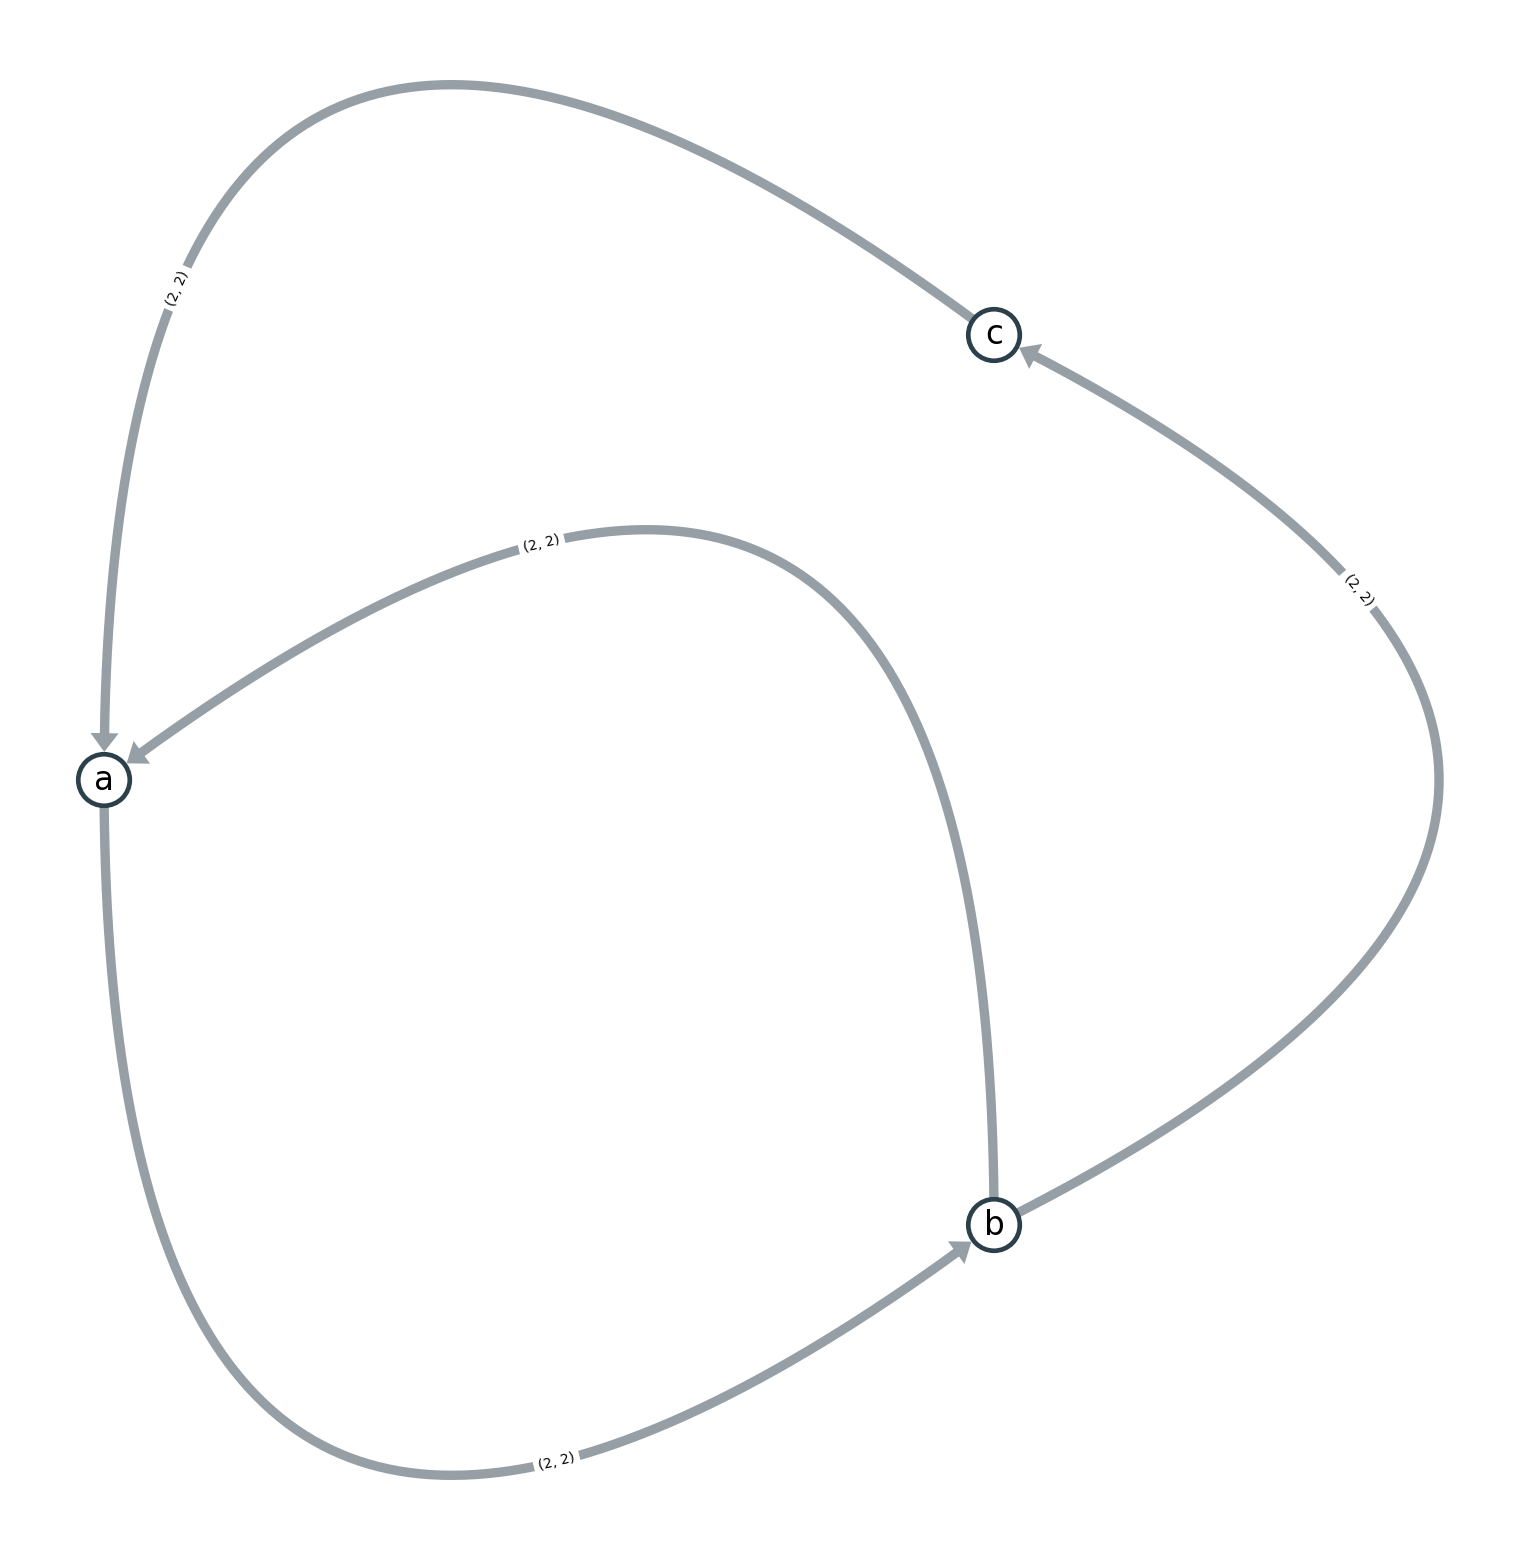

In [26]:
_ = group.plot()

### What if I still like dictionaries more?

In [27]:
neural_data = DirectedTensorGroup(
    {
        'population_a': {
            'population_b': w1.copy()
        },
        'population_b': {
            'population_a': w2.copy()
        },
        'population_c': {
            'population_a': w3.copy(),
            'population_b': w4.copy()
        }
    }
)

In [28]:
neural_data.connection_map

,population_a,population_b,population_c
population_a,0,1,0
population_b,1,0,0
population_c,1,1,0


In [29]:
neural_data['population_c']['population_b']

array([[0.07077834, 0.05312727, 0.66468818, 0.08663906, 0.91814334,
        0.17303821, 0.40555123, 0.80652164, 0.8552709 , 0.07485598],
       [0.4573142 , 0.75202382, 0.08615339, 0.61290967, 0.10435011,
        0.00735083, 0.69861108, 0.55293757, 0.12272398, 0.17554698],
       [0.17521663, 0.14900691, 0.39586567, 0.97656273, 0.2033094 ,
        0.6415144 , 0.29053314, 0.93536561, 0.72249697, 0.02414507],
       [0.94128866, 0.08536659, 0.54883785, 0.27438312, 0.49988314,
        0.20062719, 0.41933281, 0.21673818, 0.38058727, 0.6643808 ],
       [0.01292316, 0.41911121, 0.32468602, 0.07210139, 0.25750878,
        0.28065121, 0.35610677, 0.19516789, 0.38985954, 0.71623189],
       [0.78666828, 0.59438444, 0.26278196, 0.85188361, 0.13581819,
        0.26888784, 0.24148435, 0.77285169, 0.67369856, 0.85256452],
       [0.06676489, 0.31944296, 0.46356859, 0.26625962, 0.59368272,
        0.01687757, 0.4357302 , 0.73320913, 0.61052597, 0.37843414],
       [0.80378567, 0.58835581, 0.2925147

In [30]:
for key in neural_data['population_c']:
    neural_data['population_c'][key] -= .5

In [31]:
neural_data['population_c']['population_b']

array([[-4.29221662e-01, -4.46872734e-01,  1.64688183e-01,
        -4.13360941e-01,  4.18143343e-01, -3.26961789e-01,
        -9.44487675e-02,  3.06521644e-01,  3.55270904e-01,
        -4.25144023e-01],
       [-4.26857987e-02,  2.52023820e-01, -4.13846611e-01,
         1.12909671e-01, -3.95649893e-01, -4.92649174e-01,
         1.98611077e-01,  5.29375662e-02, -3.77276024e-01,
        -3.24453015e-01],
       [-3.24783366e-01, -3.50993091e-01, -1.04134329e-01,
         4.76562727e-01, -2.96690603e-01,  1.41514403e-01,
        -2.09466857e-01,  4.35365611e-01,  2.22496967e-01,
        -4.75854928e-01],
       [ 4.41288662e-01, -4.14633412e-01,  4.88378534e-02,
        -2.25616875e-01, -1.16863978e-04, -2.99372806e-01,
        -8.06671910e-02, -2.83261825e-01, -1.19412725e-01,
         1.64380805e-01],
       [-4.87076839e-01, -8.08887904e-02, -1.75313983e-01,
        -4.27898613e-01, -2.42491219e-01, -2.19348791e-01,
        -1.43893232e-01, -3.04832108e-01, -1.10140457e-01,
         2.

In [32]:
neural_data['population_c']['population_a'].min(), neural_data['population_c']['population_a'].max()

(-0.4949140246547048, 0.4961467506965048)

In [33]:
add = {
    'population_a': 1,
    'population_b': 0
}

for key in neural_data['population_c']:
    neural_data['population_c'][key] += add[key]

In [34]:
neural_data['population_c']['population_b']

array([[-4.29221662e-01, -4.46872734e-01,  1.64688183e-01,
        -4.13360941e-01,  4.18143343e-01, -3.26961789e-01,
        -9.44487675e-02,  3.06521644e-01,  3.55270904e-01,
        -4.25144023e-01],
       [-4.26857987e-02,  2.52023820e-01, -4.13846611e-01,
         1.12909671e-01, -3.95649893e-01, -4.92649174e-01,
         1.98611077e-01,  5.29375662e-02, -3.77276024e-01,
        -3.24453015e-01],
       [-3.24783366e-01, -3.50993091e-01, -1.04134329e-01,
         4.76562727e-01, -2.96690603e-01,  1.41514403e-01,
        -2.09466857e-01,  4.35365611e-01,  2.22496967e-01,
        -4.75854928e-01],
       [ 4.41288662e-01, -4.14633412e-01,  4.88378534e-02,
        -2.25616875e-01, -1.16863978e-04, -2.99372806e-01,
        -8.06671910e-02, -2.83261825e-01, -1.19412725e-01,
         1.64380805e-01],
       [-4.87076839e-01, -8.08887904e-02, -1.75313983e-01,
        -4.27898613e-01, -2.42491219e-01, -2.19348791e-01,
        -1.43893232e-01, -3.04832108e-01, -1.10140457e-01,
         2.

In [35]:
neural_data['population_c']['population_a'].min(), neural_data['population_c']['population_a'].max()

(0.5050859753452952, 1.496146750696505)

In [36]:
neural_ratio = {
    'population_a': {
        'population_b': 10
    },
    'population_b': {
        'population_a': 100
    },
    'population_c': {
        'population_a': 1000,
        'population_b': 10000
    }
}

In [37]:
neural_data['population_a']

ConnectionProxy for TensorConnection(from population_a| population_b: ((10, 10, 1000)))

In [38]:
for key1 in neural_data:
    for key2 in neural_data[key1]:
        neural_data[key1][key2] *= neural_ratio[key1][key2]

In [39]:
neural_data['population_c']['population_b']

array([[-4.29221662e+03, -4.46872734e+03,  1.64688183e+03,
        -4.13360941e+03,  4.18143343e+03, -3.26961789e+03,
        -9.44487675e+02,  3.06521644e+03,  3.55270904e+03,
        -4.25144023e+03],
       [-4.26857987e+02,  2.52023820e+03, -4.13846611e+03,
         1.12909671e+03, -3.95649893e+03, -4.92649174e+03,
         1.98611077e+03,  5.29375662e+02, -3.77276024e+03,
        -3.24453015e+03],
       [-3.24783366e+03, -3.50993091e+03, -1.04134329e+03,
         4.76562727e+03, -2.96690603e+03,  1.41514403e+03,
        -2.09466857e+03,  4.35365611e+03,  2.22496967e+03,
        -4.75854928e+03],
       [ 4.41288662e+03, -4.14633412e+03,  4.88378534e+02,
        -2.25616875e+03, -1.16863978e+00, -2.99372806e+03,
        -8.06671910e+02, -2.83261825e+03, -1.19412725e+03,
         1.64380805e+03],
       [-4.87076839e+03, -8.08887904e+02, -1.75313983e+03,
        -4.27898613e+03, -2.42491219e+03, -2.19348791e+03,
        -1.43893232e+03, -3.04832108e+03, -1.10140457e+03,
         2.

In [40]:
for key1 in neural_data:
    for key2 in neural_data[key1]:
        neural_data[key1][key2] = neural_ratio[key1][key2]*np.sin(neural_data[key1][key2])

In [41]:
new_neural_data['population_c']['population_b']

array([[-7180.91639638, -9823.40667536,  6344.37726818,  6642.7712132 ,
          263.90494328, -7033.26051546, -9051.41877481, -8293.73910971,
         4189.1405257 ,  7613.31853446],
       [ 3881.41099992,  6294.85502764,  8352.47120301, -9535.92170385,
         9437.45765528, -4568.54634745,  5844.56035689,  9998.50361134,
        -2883.86952806, -6706.29851087],
       [ 5422.7961793 ,  6975.09867475,  9955.21451683,  1679.84087084,
        -9466.14039764,  9897.26628242, -6988.07933021, -5574.48687396,
         6609.43652059, -8212.44719646],
       [ 8679.49998598,  5381.01439725, -9903.37929803, -4840.08253516,
        -9202.19053282, -2082.09300403, -6574.2892827 ,  8904.47933887,
        -3165.07011222, -6853.55202981],
       [-9634.98371091,  9973.94401763, -1307.56546504, -1365.04917209,
         3869.62766587, -6101.37254155,  -827.89444469, -8283.78005022,
        -9620.58839653,  7852.8193671 ],
       [ 9997.89752587,  9792.29560249,  2743.65358049,  2496.27213673,
   

In [42]:
neural_data['population_c'] = {
    'population_d': np.eye(10),
    'population_e': np.eye(100),
}

In [43]:
neural_data.connection_map

,population_a,population_b,population_c,population_e,population_d
population_a,0,1,0,0,0
population_b,1,0,0,0,0
population_c,0,0,0,1,1


In [44]:
neural_data['population_c']['population_d']

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [45]:
neural_data['population_b']['population_a']

array([[-90.09844095,  92.88383203, -23.07745632, ..., -15.71598985,
        -98.59942734,  52.95409945],
       [ 86.23310255, -75.30395843,  96.26672198, ...,  56.20126471,
         91.85291182, -66.99622284],
       [-24.08783247, -99.99421007,  30.91740054, ...,  72.76668386,
        -19.97906049,  98.30187477],
       ...,
       [ 45.25225388,  88.37868884, -99.53160728, ..., -94.11969098,
        -28.937799  ,  22.11055807],
       [ 99.67310293, -97.19665762,   7.63706703, ..., -60.84103497,
        -94.70174691,  99.76602909],
       [ 89.8824845 , -95.64003635, -86.62363113, ...,  56.21003858,
         66.44590031, -43.9003803 ]])

In [46]:
neural_data['population_b']['population_a']@neural_data['population_c']['population_d']

array([[-90.09844095,  92.88383203, -23.07745632, ..., -15.71598985,
        -98.59942734,  52.95409945],
       [ 86.23310255, -75.30395843,  96.26672198, ...,  56.20126471,
         91.85291182, -66.99622284],
       [-24.08783247, -99.99421007,  30.91740054, ...,  72.76668386,
        -19.97906049,  98.30187477],
       ...,
       [ 45.25225388,  88.37868884, -99.53160728, ..., -94.11969098,
        -28.937799  ,  22.11055807],
       [ 99.67310293, -97.19665762,   7.63706703, ..., -60.84103497,
        -94.70174691,  99.76602909],
       [ 89.8824845 , -95.64003635, -86.62363113, ...,  56.21003858,
         66.44590031, -43.9003803 ]])

In [47]:
np.all(neural_data['population_b']['population_a'] == neural_data['population_b']['population_a']@neural_data['population_c']['population_d'])

True

In [48]:
group1 = DirectedTensorGroup(
    {
        'a': {
            'b': np.array([[1, 2], [3, 4]])
        },
        'b': {
            'a': np.array([[5, 6], [7, 8]])
        }
    }
)

group2 = DirectedTensorGroup(
    {
        'b': {
            'c': np.array([[9, 10], [11, 12]])
        },
        'c': {
            'a': np.array([[13, 14], [15, 16]])
        }
    }
)

group = group1.copy()
group.update(group2)

# or
# group.update(
#     {
#         'b': {
#             'c': np.array([[9, 10], [11, 12]])
#         },
#         'c': {
#             'a': np.array([[13, 14], [15, 16]])
#         }
#     }
# )

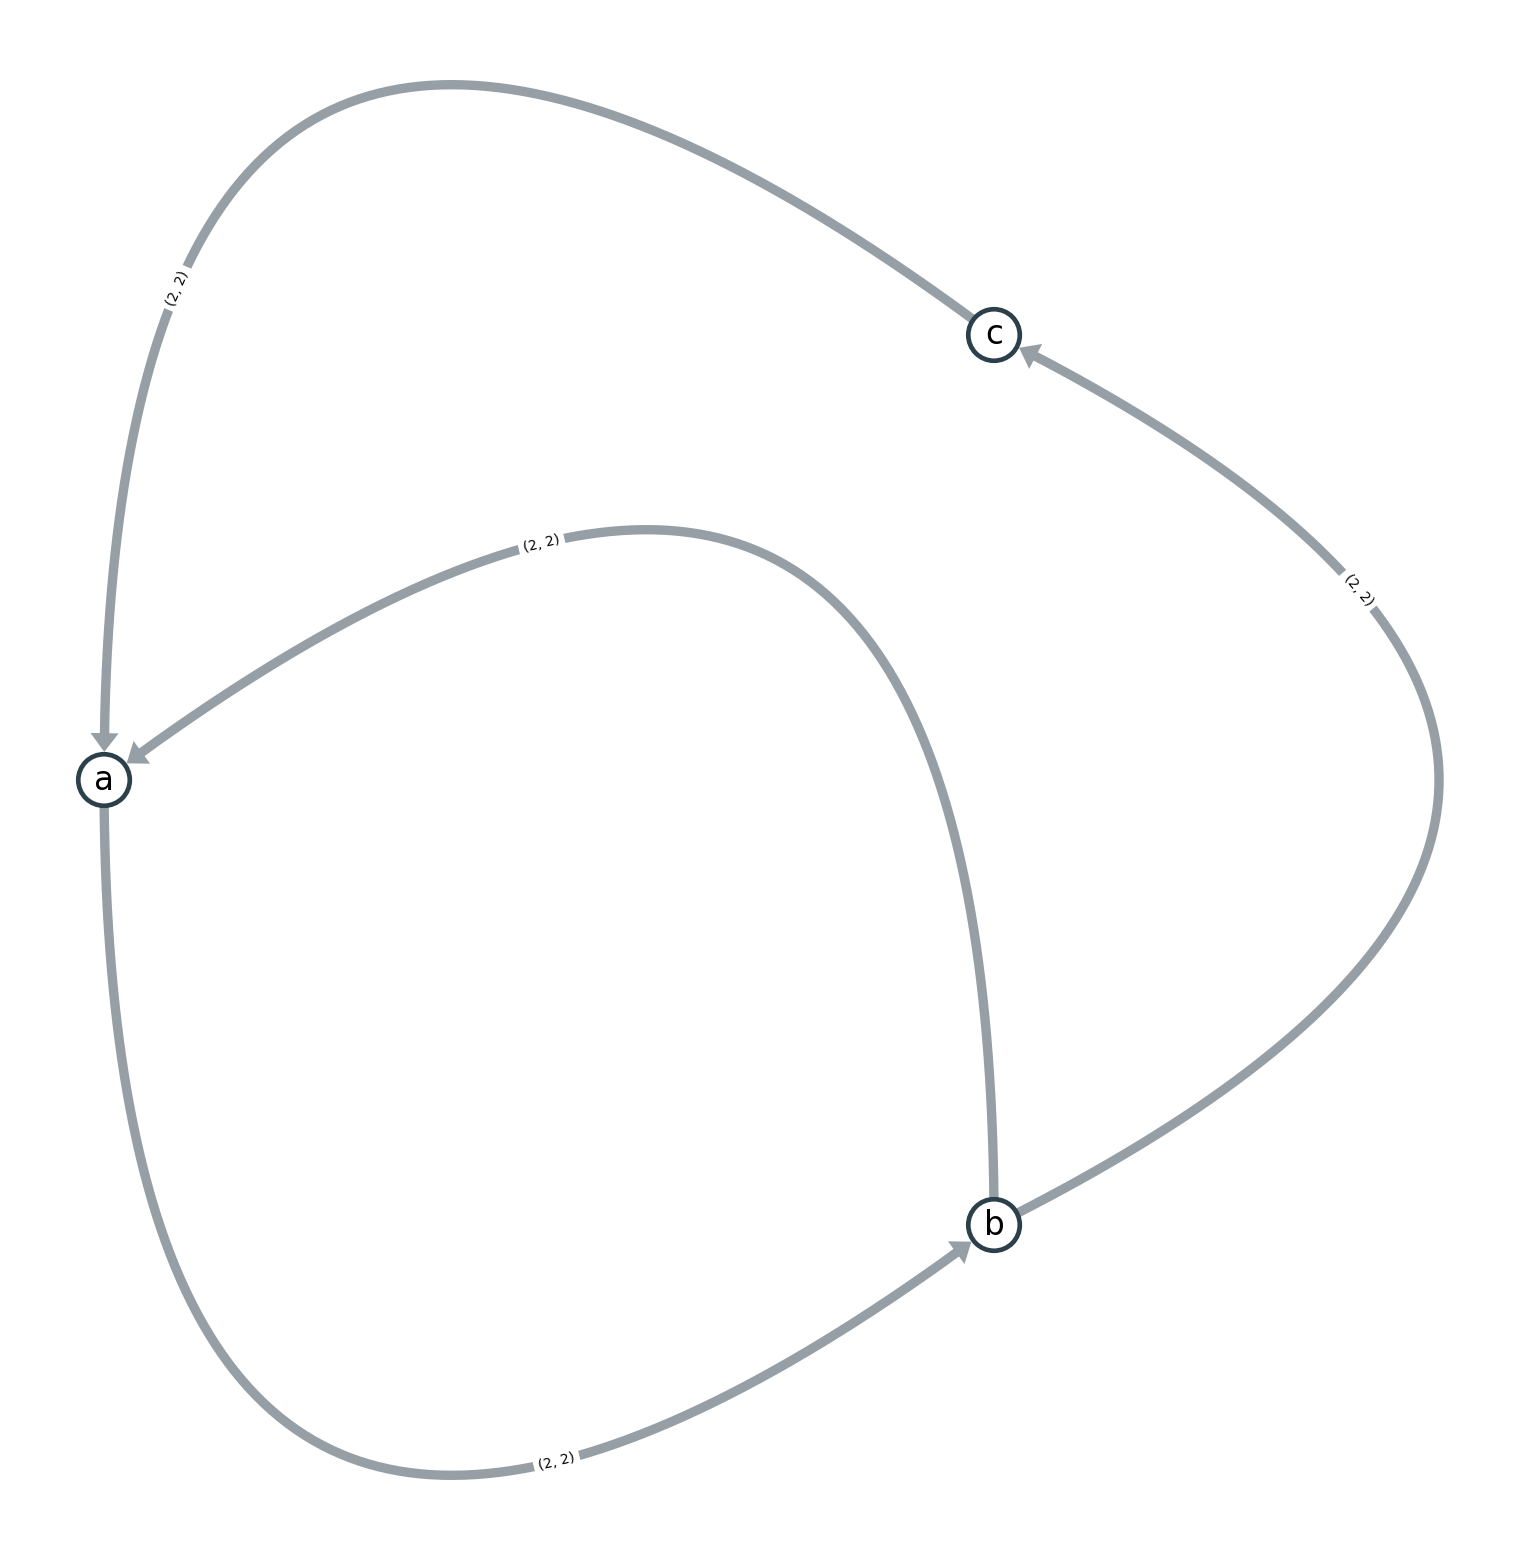

In [49]:
_ = group.plot()

### Everything works! Let's save that

In [50]:
neural_data.save('../neural_data.pkl')

### And read

In [51]:
loaded_neural_data = DirectedTensorGroup.load('../neural_data.pkl')

In [52]:
np.all(
    neural_data.population_a.to.population_b == loaded_neural_data.population_a.to.population_b
)

True